#Problem Statement :- Protfolio Management using ML

In [ ]:
import numpy as np
from numpy import cov
from scipy.stats import pearsonr,spearmanr
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from numpy import math
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = read_csv('/content/all_stocks_5yr.csv')
df.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [ ]:
df_2=pd.read_csv('/content/all_stocks_5yr.csv')
df_2.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
df.shape

(619040, 7)

In [ ]:
df = df.set_index('date')#we set the date column as index

      Exploratory Data Analysis

In [ ]:
# Calulating daily Daily_return#creating new features
#df['Daily_return'] = df['close']/df['open']-1 
df['changeduringday'] = ((df['high'] - df['low'] )/ df['low'])*100

df['changefrompreviousday'] = (abs(df['close'].shift() - df['close'] )/ df['close'])*100
df.head()

,open,high,low,close,volume,Name,changeduringday,changefrompreviousday
date,,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,3.349282,NaN
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,5.259467,2.005533
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2.907801,1.331465
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,4.842105,2.660300
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,13.677812,4.789135


In [ ]:
#df = df.fillna(method='ffill')#frontfill used to fill the null values

In [ ]:
df.isnull().sum()#all null values filled

open                     11
high                      8
low                       8
close                     0
volume                    0
Name                      0
changeduringday           8
changefrompreviousday     1
dtype: int64

In [ ]:
df = df.fillna(method='ffill')#frontfill used to fill the null values

In [ ]:
df = df.dropna()#dropped the one null values which was NaN
df.isnull().sum()

open                     0
high                     0
low                      0
close                    0
volume                   0
Name                     0
changeduringday          0
changefrompreviousday    0
dtype: int64

In [ ]:
df.duplicated().sum()

5

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
value = df.quantile(0.98)#if eg:2.3456785674675..... then it will be converted to 98% of 2.3456785674675.....
df = df.replace(np.inf, value)#replace that values with infinite value

In [ ]:
df.describe()

,open,high,low,close,volume,changeduringday,changefrompreviousday
count,619034.000000,619034.000000,619034.000000,619034.000000,6.190340e+05,619034.000000,619034.000000
mean,83.024009,83.779099,82.256845,83.043940,4.321839e+06,1.936899,1.240529
std,97.380144,98.209108,96.508914,97.390171,8.693646e+06,1.462067,16.333592
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00,-1.069182,0.000000
25%,40.220000,40.620000,39.830000,40.245000,1.070328e+06,1.176471,0.333948
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06,1.620426,0.748628
75%,94.370000,95.180000,93.540000,94.410000,4.284514e+06,2.304856,1.406695
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08,596.666667,8183.354839


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619034 entries, 2013-02-11 to 2018-02-07
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   open                   619034 non-null  float64
 1   high                   619034 non-null  float64
 2   low                    619034 non-null  float64
 3   close                  619034 non-null  float64
 4   volume                 619034 non-null  int64  
 5   Name                   619034 non-null  object 
 6   changeduringday        619034 non-null  float64
 7   changefrompreviousday  619034 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 42.5+ MB


In [ ]:
ticker = 'AAL'
df_demo = df[df['Name'] == ticker]
df_demo.shape

(1258, 8)

Pearsons correlation: 0.998


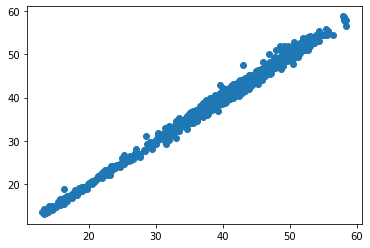

In [ ]:
corr, _ = pearsonr(df_demo['close'],df_demo['open'])
print('Pearsons correlation: %.3f' % corr)
plt.scatter(df_demo['close'],df_demo['open'])#close is the target column
plt.show()
#gives corelation between open and close values

We can see that the closing price and open price are positively correlated and that the correlation is 0.9. This suggests a high level of correlation, (a value above 0.5 and close to 1.0.)

Pearsons correlation: 0.999


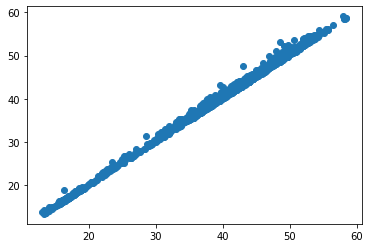

In [ ]:
corr, _ = pearsonr(df_demo['close'],df_demo['high'])
print('Pearsons correlation: %.3f' % corr)
plt.scatter(df_demo['close'],df_demo['high'])
plt.show()

We can see that the closing price and high price are positively correlated and that the correlation is 0.99. This suggests a high level of correlation

Pearsons correlation: 0.999


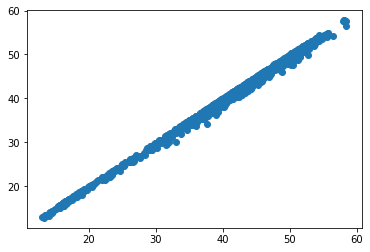

In [ ]:
corr, _ = pearsonr(df_demo['close'],df_demo['low'])
print('Pearsons correlation: %.3f' % corr)
plt.scatter(df_demo['close'],df_demo['low'])
plt.show()

We can see that the closing price and high price are positively correlated and that the correlation is 0.99. This suggests a high level of correlation

Pearsons correlation: -0.005
Spearmans correlation: -0.099


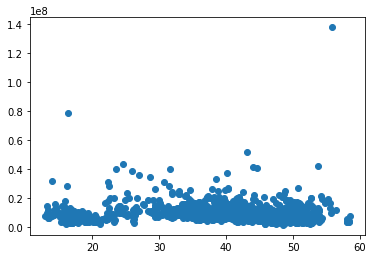

In [ ]:
corr, _ = pearsonr(df_demo['close'],df_demo['volume'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(df_demo['close'],df_demo['volume'])
print('Spearmans correlation: %.3f' % corr)
plt.scatter(df_demo['close'],df_demo['volume'])
plt.show()
#close and volume are weakly corelated(negatively corelated)

      Train-test split :- 

In [ ]:
#evaluation function
def eval_fun(Y_test,Y_pred):
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    r2 = r2_score(y_test,Y_pred)
    mse = mean_squared_error(y_test,Y_pred)
    mae = mean_absolute_error(y_test,Y_pred)
    return r2, mse, mae

In [ ]:
df = df.drop(['Name','volume'], axis=1)

In [ ]:
#train test split into 80-20
x = df.drop(['close'], axis=1)
y =  df['close']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
                                                                            

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((495227, 5), (123807, 5), (495227,), (123807,))

In [ ]:
from sklearn.preprocessing import StandardScaler# it makes all mean=0 and s.d=1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
value = df.quantile(0.98)
df = df.replace(np.inf, value)

In [ ]:
#print(X_train.astype(np.float32))
X_train = np.nan_to_num(X_train.astype(np.float32))# to remove the float 32 error

      Appling linear regression here

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
Y_pred_reg = reg.predict(X_test)

In [ ]:
r2, mse, mae = eval_fun(y_test,Y_pred_reg) 
print("r2 score = ", r2, "mse = ", mse, " mae =", mae)

r2 score =  0.9999506899054441 mse =  0.486834909527814  mae = 0.34044377192316344


      DTR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
Y_pred_dt = regressor.predict(X_test)

In [ ]:
r2, mse, mae = eval_fun(y_test,Y_pred_dt) 
print("r2 score = ", r2, "mse = ", mse, " mae =", mae)

r2 score =  0.9998980614950876 mse =  1.0064313050577915  mae = 0.4105517014385292


      RandomForestRegression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0,oob_score=True)
rf.fit(X_train,y_train)
Y_pred = rf.predict(X_test)

    Evaluating RF

In [ ]:
r2, mse, mae = eval_fun(y_test,Y_pred) 
print("r2 score = ", r2, "mse = ", mse, " mae =", mae)

r2 score =  0.9999428141996209 mse =  0.5645911695075657  mae = 0.3149424190716196


    Hyper Parameter tuning for Random forest using grid serach

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(oob_score=True)

In [ ]:
param_grid = {
'n_estimators' : [ 50, 100],
'max_depth' :[ 3,5],
'max_features' : ['sqrt', 'log2'],
'max_samples' : [ 0.8, 0.9]
}

In [ ]:
gscv =GridSearchCV(estimator = rf, param_grid = param_grid, cv=2, verbose=2)
gscv.fit(X_train,y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END max_depth=3, max_features=sqrt, max_samples=0.8, n_estimators=50; total time=   8.8s
[CV] END max_depth=3, max_features=sqrt, max_samples=0.8, n_estimators=50; total time=   8.8s
[CV] END max_depth=3, max_features=sqrt, max_samples=0.8, n_estimators=100; total time=  17.6s
[CV] END max_depth=3, max_features=sqrt, max_samples=0.8, n_estimators=100; total time=  17.5s
[CV] END max_depth=3, max_features=sqrt, max_samples=0.9, n_estimators=50; total time=   9.3s
[CV] END max_depth=3, max_features=sqrt, max_samples=0.9, n_estimators=50; total time=   9.3s
[CV] END max_depth=3, max_features=sqrt, max_samples=0.9, n_estimators=100; total time=  18.6s
[CV] END max_depth=3, max_features=sqrt, max_samples=0.9, n_estimators=100; total time=  18.8s
[CV] END max_depth=3, max_features=log2, max_samples=0.8, n_estimators=50; total time=   9.0s
[CV] END max_depth=3, max_features=log2, max_samples=0.8, n_estimators=50; total time=   

GridSearchCV(cv=2, estimator=RandomForestRegressor(oob_score=True),
             param_grid={'max_depth': [3, 5], 'max_features': ['sqrt', 'log2'],
                         'max_samples': [0.8, 0.9], 'n_estimators': [50, 100]},
             verbose=2)

In [ ]:
#best parameter
gscv.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'max_samples': 0.8,
 'n_estimators': 50}

In [ ]:
#hyperparameter tuning
rf = RandomForestRegressor(n_estimators=50,max_depth=5,max_samples=0.9, oob_score=True,random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_samples=0.9, n_estimators=50,
                      oob_score=True, random_state=0)

In [ ]:
Y_pred_rf = rf.predict(X_test)

In [ ]:
r2, mse, mae = eval_fun(y_test,Y_pred_rf) 
print("r2 score = ", r2, "mse = ", mse, " mae =", mae)

r2 score =  0.9980111632805019 mse =  19.635637552985727  mae = 3.3487264075884817


    XGboost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
param_grid = {
'n_estimators' : [ 50, 100],

'subsample' : [0.7, 0.8],
'max_depth' :[ 5,7]
}

In [ ]:
gscv =GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = param_grid, cv=2, verbose=2)

In [ ]:
gscv.fit(X_train,y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END ........max_depth=5, n_estimators=50, subsample=0.7; total time=  43.7s
[CV] END ........max_depth=5, n_estimators=50, subsample=0.7; total time=  43.0s
[CV] END ........max_depth=5, n_estimators=50, subsample=0.8; total time=  47.7s
[CV] END ........max_depth=5, n_estimators=50, subsample=0.8; total time=  57.0s
[CV] END .......max_depth=5, n_estimators=100, subsample=0.7; total time= 1.3min
[CV] END .......max_depth=5, n_estimators=100, subsample=0.7; total time= 1.3min
[CV] END .......max_depth=5, n_estimators=100, subsample=0.8; total time= 1.4min
[CV] END .......max_depth=5, n_estimators=100, subsample=0.8; total time= 1.4min
[CV] END ........max_depth=7, n_estimators=50, subsample=0.7; total time=  48.4s
[CV] END ........max_depth=7, n_estimators=50, subsample=0.7; total time=  48.1s
[CV] END ........max_depth=7, n_estimators=50, subsample=0.8; total time=  53.9s
[CV] END ........max_depth=7, n_estimators=50, su

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 7], 'n_estimators': [50, 100],
                         'subsample': [0.7, 0.8]},
             verbose=2)

In [ ]:
gscv.best_params_

{'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}

In [ ]:
gbr = GradientBoostingRegressor(max_depth= 7, n_estimators= 100, subsample= 0.8,learning_rate=0.06,random_state=0)
gbr.fit(X_train,y_train)


GradientBoostingRegressor(learning_rate=0.06, max_depth=7, random_state=0,
                          subsample=0.8)

In [ ]:
Y_pred_gbr = gbr.predict(X_test)

In [ ]:
# 1 compare mse, mae and r2 score
r2, mse, mae = eval_fun(y_test,Y_pred_gbr) 

print("r2 score = ", r2, "mse = ", mse, " mae =", mae)

r2 score =  0.9999257621308251 mse =  0.7329449811206183  mae = 0.4240391728252982


In [ ]:
#ticker = 'AAPL'
#stock_a = df_2[df_2['Name'] == ticker]
#print(stock_a)
def xgbModel(ticker):
  stock_a = df_2[df_2['Name'] == ticker]
  #print("Stock_A",stock_a.head())
  #Adding new features 
  #1 Price movement during day time 
  stock_a = stock_a.set_index('date')#we set the date column as index
  #stock_a['changeduringday'] = ((df_2['high'] - df_2['low'] )/ df_2['low'])*100
  stock_a['changeduringday'] = ((stock_a['high'] - stock_a['low'] )/ stock_a['low'])*100

  #2 Price movement 
  stock_a['changefrompreviousday'] = (abs(stock_a['close'].shift() - stock_a['close'] )/ stock_a['close'])*100
  #print(stock_a.head())


  #2 Price movement 
  

  #2 Price movement 
  #stock_a['changefrompreviousday'] = (abs(stock_a['close'].shift() - stock_a['close'] )/ df_2['close'])*100

  stock_a = stock_a.drop(['Name'], axis=1)
  #check nan value
  stock_a = stock_a.fillna(method='ffill')
  #if still nan value then drop it    
  stock_a = stock_a.dropna()
  #check infinity value and replace it
  value = stock_a.quantile(0.98)#if eg:2.3456785674675..... then it will be converted to 98% of 2.3456785674675.....
  stock_a= stock_a.replace(np.inf, value) 
  X_stock_a = stock_a.drop(['close'], axis=1)
  y_stock_a = stock_a['close']
  #X_train.columns
  X_stock_train, X_stock_test, y_stock_train, y_stock_test = train_test_split(X_stock_a, y_stock_a, test_size=0.2, train_size=0.8, random_state=42) 
  #print(X_stock_train.shape,X_stock_test.shape, y_stock_train.shape, y_stock_test.shape)
  from sklearn.preprocessing import StandardScaler# it makes all mean=0 and s.d=1
  sc = StandardScaler()
  X_stock_train = sc.fit_transform(X_stock_train)
  X_stock_test = sc.transform(X_stock_test)                                                                            
    #from sklearn.preprocessing import MinMaxScaler
    #sc = MinMaxScaler(feature_range = (0, 1))
    #training_set_scaled = sc.fit_transform(stock_a)
    #df = df.set_index('date')
  X_stock_train.astype(np.float32)
  X_stock_test.astype(np.float32)
  X_stock_train = np.nan_to_num(X_stock_train.astype(np.float32))
  X_stock_test = np.nan_to_num(X_stock_test.astype(np.float32))
  y_stock_train.astype(np.float32)
  y_stock_test.astype(np.float32)
  y_stock_train = np.nan_to_num(y_stock_train.astype(np.float32))
  y_stock_test = np.nan_to_num(y_stock_test.astype(np.float32))

    
  #print(X_stock_a.shape,"zzzz")
  model =  gbr.fit(X_stock_a, y_stock_a)
  
  return model.feature_importances_,stock_a
 

In [ ]:
xgbModel(ticker)

(array([9.38417877e-04, 6.63097943e-01, 3.35330256e-01, 1.68295002e-04,
        2.28050711e-04, 2.37037344e-04]),
              open   high    low  close    volume  changeduringday  \
 date                                                                
 2013-02-11  14.89  15.01  14.26  14.46   8882000         5.259467   
 2013-02-12  14.45  14.51  14.10  14.27   8126000         2.907801   
 2013-02-13  14.30  14.94  14.25  14.66  10259500         4.842105   
 2013-02-14  14.94  14.96  13.16  13.99  31879900        13.677812   
 2013-02-15  13.93  14.61  13.93  14.50  15628000         4.881551   
 ...           ...    ...    ...    ...       ...              ...   
 2018-02-01  54.00  54.64  53.59  53.88   3623078         1.959321   
 2018-02-02  53.49  53.99  52.03  52.10   5109361         3.767057   
 2018-02-05  51.99  52.39  49.75  49.76   6878284         5.306533   
 2018-02-06  49.32  51.50  48.79  51.18   6782480         5.554417   
 2018-02-07  50.91  51.98  50.89  51.40   4845

In [ ]:
#pandas.DataFrame.T property is used to transpose index and columns of the data frame
res = pd.DataFrame([y_test.values, Y_pred_rf, Y_pred_gbr]).T
res.columns = ['Y_test', 'Y_pred_rf', 'Y_pred_gbr']
res.head()

,Y_test,Y_pred_rf,Y_pred_gbr
0,135.73,138.487465,136.674773
1,106.70,103.752637,105.063925
2,38.81,42.634749,38.498129
3,72.25,76.841524,72.178253
4,100.57,103.752637,99.828039


In [ ]:
#Statistics Significance test  

from sklearn.model_selection import cross_val_score
from scipy import stats

def display_scores(scores):
    print("Scores", scores,"Mean", scores.mean(),"Standard deviation", scores.std())

kFolds=20

rf_score = cross_val_score(rf, X_train, y_train,scoring="neg_mean_squared_error", cv=kFolds)
control =np.sqrt(-rf_score)#rmse score
display_scores(control)

scores = cross_val_score(gbr, X_train, y_train,scoring="neg_mean_squared_error", cv=kFolds)
treatment = np.sqrt(-scores)
display_scores(treatment)

#paired t-test,values before and after the training
(t_score, p_value) = stats.ttest_rel(control, treatment)
print("The p-value = %0.5f for a t-score = %0.5f." %(p_value, t_score))

Scores [4.31850639 4.26543827 4.59150379 4.26914372 4.22091076 4.44391259
 4.28652718 4.39028282 4.30726812 4.26240701 4.16016114 4.26122658
 4.419463   4.61056828 4.30431011 4.42186728 4.3297806  4.39463257
 4.34825856 4.2871549 ] Mean 4.344666183210454 Standard deviation 0.11029854161787081
Scores [0.86554889 0.90704012 0.84039248 0.79025846 0.72117752 0.94144715
 0.80540126 0.8840849  0.74632936 0.85332881 0.84421333 0.84580153
 0.80708013 0.76584876 0.78782344 0.77098481 0.95641201 0.89079648
 0.79933733 0.75950302] Mean 0.8291404884929221 Standard deviation 0.06330477966911502
The p-value = 0.00000 for a t-score = 123.47044.


In [ ]:
if p_value > 0.05/2:  #Two sided 
    print('There is no significant difference between the two machine learning (Accept H0)')
else:
    print('The two machine learning  are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )
    if t_score < 0.0:
        print('Machine learning random forest is better than xgboost')
    else:
        print('Machine learning xgboost is better than random forest')

The two machine learning  are different (reject H0) 
(t_score, p_value) = (123.47, 0.00000)
Machine learning xgboost is better than random forest


In [ ]:
#Classification function homegrown logic based on stock price mean variation  
def classify (meanValue):
    if meanValue <=1.5:
        return 'Low'
    elif meanValue >1.5 and  meanValue <=2.5:
        return 'Medium'
    elif meanValue >2.5:
        return 'High'

In [ ]:
#using all the 500 stocks for training 
ticker_list = np.unique(df_2['Name'])
#print(ticker_list)
df_1 = pd.DataFrame(columns=['TICKER','CLASS','Coef for open','Coef for high','Coef for low','Coef for volume','Coef for change within day','Coef for change from prev day'])
#df_1 is a new dataframe for calculated coefficients ie it has columns ('TICKER','CLASS','Coef for open','Coef for high','Coef fo......)
for ticker in ticker_list[:500]:
  #print(ticker)
  #model,stock_a = linearModel(ticker)    
  stock_a = df_2[df_2['Name'] == ticker]
  value = df_2.quantile(0.98)
  #print(stock_a)
  
  stock_a['changeduringday'] = ((df_2['high'] - df_2['low'] )/ df_2['low'])*100
  stock_a['changefrompreviousday'] = (abs(stock_a['close'].shift() - stock_a['close'] )/ df_2['close'])*100
  stock_a = stock_a.drop(['date', 'Name'], axis=1)
  #stock_a.columns
  #stock_a.head()
  stock_a = stock_a.fillna(method='ffill')    
  stock_a= stock_a.replace(np.inf, value) 
  X_stock_a = stock_a.drop(['close'], axis=1)
  y_stock_a = stock_a['close']
  #X_train.columns
  X_stock_train, X_stock_test, y_stock_train, y_stock_test = train_test_split(X_stock_a, y_stock_a, test_size=0.2,  random_state=42) 
                                                                              
    #from sklearn.preprocessing import MinMaxScaler
    #sc = MinMaxScaler(feature_range = (0, 1))
    #training_set_scaled = sc.fit_transform(stock_a)
    #df = df.set_index('date')
  X_stock_train.astype(np.float32)
  X_stock_test.astype(np.float32)
  X_stock_train = np.nan_to_num(X_stock_train.astype(np.float32))
  X_stock_test = np.nan_to_num(X_stock_test.astype(np.float32))
  y_stock_train.astype(np.float32)
  y_stock_test.astype(np.float32)
  y_stock_train = np.nan_to_num(y_stock_train.astype(np.float32))
  y_stock_test = np.nan_to_num(y_stock_test.astype(np.float32))
  model = gbr.fit(X_stock_train, y_stock_train)
    
    #model = rf.named_steps['lr']
    #print("Mean value:",stock_a["changeduringday"].mean())
    #adding target class 
  stock_features = np.concatenate((np.asarray([ticker,classify(stock_a["changeduringday"].mean())]),model.feature_importances_))
    #changeduringday is passed as a parameter  to the function classify defined above
  df_1.loc[-1] = stock_features  # adding a row (ie making a column which store high,medium,low risk)
  df_1.index = df_1.index + 1  # shifting index
  df_1 = df_1.sort_index() 
   
#print(df)

#saving feature coefficients and target class for 500 stocks 
#converting dataframe to csv file
df_1.to_csv('coeff1.csv', mode='a',header=['TICKER','CLASS','Coef for open','Coef for high','Coef for low','Coef for volume','Coef for change within day','Coef for change from prev day'])

In [ ]:
df = read_csv('/content/coeff1.csv',header=0)
df.head()

,Unnamed: 0,TICKER,CLASS,Coef for open,Coef for high,Coef for low,Coef for volume,Coef for change within day,Coef for change from prev day
0,0,XRX,Medium,0.002190,0.429211,0.567883,0.000199,0.000217,0.000301
1,1,XRAY,Medium,0.086401,0.685318,0.227484,0.000221,0.000239,0.000337
2,2,XOM,Low,0.000758,0.644630,0.352740,0.000654,0.000665,0.000553
3,3,XLNX,Medium,0.219305,0.197295,0.582867,0.000148,0.000167,0.000217
4,4,XL,Medium,0.001729,0.802704,0.194414,0.000375,0.000276,0.000503


In [ ]:
#print(df.iloc[:1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     500 non-null    int64  
 1   TICKER                         500 non-null    object 
 2   CLASS                          500 non-null    object 
 3   Coef for open                  500 non-null    float64
 4   Coef for high                  500 non-null    float64
 5   Coef for low                   500 non-null    float64
 6   Coef for volume                500 non-null    float64
 7   Coef for change within day     500 non-null    float64
 8   Coef for change from prev day  500 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 35.3+ KB


In [ ]:
# loading libraries
import numpy as np
from sklearn.model_selection import train_test_split
#df=float(df)
X_class = df.drop(['CLASS','TICKER','Unnamed: 0'],axis=1) #drop(['close'], axis=1)
y_class = df['CLASS']

# split into train and test
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [ ]:
X_class.head(10)

,Coef for open,Coef for high,Coef for low,Coef for volume,Coef for change within day,Coef for change from prev day
0,0.002190,0.429211,0.567883,0.000199,0.000217,0.000301
1,0.086401,0.685318,0.227484,0.000221,0.000239,0.000337
2,0.000758,0.644630,0.352740,0.000654,0.000665,0.000553
3,0.219305,0.197295,0.582867,0.000148,0.000167,0.000217
4,0.001729,0.802704,0.194414,0.000375,0.000276,0.000503
5,0.201077,0.607974,0.190585,0.000119,0.000124,0.000121
6,0.003156,0.641884,0.353235,0.000483,0.000573,0.000668
7,0.051612,0.293349,0.654644,0.000126,0.000136,0.000133
8,0.001964,0.379999,0.617444,0.000174,0.000198,0.000221
9,0.009113,0.688400,0.299468,0.000842,0.001069,0.001108


In [ ]:
y_class.head()

0    Medium
1    Medium
2       Low
3    Medium
4    Medium
Name: CLASS, dtype: object

In [ ]:
sc_X = StandardScaler()
X_train_class = sc_X.fit_transform(X_train_class)
X_test_class = sc_X.fit_transform(X_test_class)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=10)

# fitting the model
knn.fit(X_train_class, y_train_class)
knn.score(X_test_class,y_test_class)
# predict the response
pred = knn.predict(X_test_class)

# evaluate accuracy
print ("Accuracy of KNN ", accuracy_score(y_test_class, pred))
print ("score of KNN ",knn.score(X_test_class,y_test_class) )

Accuracy of KNN  0.65
score of KNN  0.65


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test_class)
cm = confusion_matrix(y_test_class,y_pred)
cm

array([[ 1,  0, 20],
       [ 0,  1, 14],
       [ 1,  0, 63]])

In [ ]:
#delete the cell later
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=4)

# fitting the model
knn.fit(X_train_class, y_train_class)

# predict the response
pred = knn.predict(X_test_class)

# evaluate accuracy
print ("Accuracy of KNN ", accuracy_score(y_test_class, pred))

Accuracy of KNN  0.63


In [ ]:
from sklearn.cluster import KMeans
# since class is target col and ticker is object/chracter col
X_class = df.drop(['CLASS','TICKER','Unnamed: 0'],axis=1) 	# end index is exclusive

k_mean = KMeans()

#number of clusters will be decided by K-mean++ , by default 
k_mean_model_1 = k_mean.fit(X_class)

print("Number of clusters",k_mean_model_1.n_clusters)

Number of clusters 8


In [ ]:
df.head()

,Unnamed: 0,TICKER,CLASS,Coef for open,Coef for high,Coef for low,Coef for volume,Coef for change within day,Coef for change from prev day
0,0,XRX,Medium,0.002190,0.429211,0.567883,0.000199,0.000217,0.000301
1,1,XRAY,Medium,0.086401,0.685318,0.227484,0.000221,0.000239,0.000337
2,2,XOM,Low,0.000758,0.644630,0.352740,0.000654,0.000665,0.000553
3,3,XLNX,Medium,0.219305,0.197295,0.582867,0.000148,0.000167,0.000217
4,4,XL,Medium,0.001729,0.802704,0.194414,0.000375,0.000276,0.000503


In [ ]:
#Predicting the cluster assignment for 500 stocks 

#Dropping the CLASS column added as part of classification , we don't need for clustering
df_cluster = df.drop(['CLASS'], axis=1)

#Selecting features from dataframe , there are 6 features 
X_cluster = df.drop(['CLASS','TICKER'], axis=1)

y_pred = k_mean_model_1.predict(X_cluster)

pred_df = pd.DataFrame({ 'Stock': df_cluster['TICKER'],'Cluster': y_pred})

In [ ]:
labels =k_mean_model_1.labels_
labels

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
pred_df.head(n=20)

,Stock,Cluster
0,XRX,5
1,XRAY,5
2,XOM,5
3,XLNX,5
4,XL,5
5,XEL,5
6,XEC,5
7,WYNN,5
8,WYN,5
9,WY,5


      Appling kmeans

In [ ]:
df.head()

,Unnamed: 0,TICKER,CLASS,Coef for open,Coef for high,Coef for low,Coef for volume,Coef for change within day,Coef for change from prev day
0,0,XRX,Medium,0.002190,0.429211,0.567883,0.000199,0.000217,0.000301
1,1,XRAY,Medium,0.086401,0.685318,0.227484,0.000221,0.000239,0.000337
2,2,XOM,Low,0.000758,0.644630,0.352740,0.000654,0.000665,0.000553
3,3,XLNX,Medium,0.219305,0.197295,0.582867,0.000148,0.000167,0.000217
4,4,XL,Medium,0.001729,0.802704,0.194414,0.000375,0.000276,0.000503


In [ ]:
from sklearn.cluster import KMeans

X_class = df.drop(['CLASS','TICKER','Unnamed: 0'],axis=1) 	# end index is exclusive
X_class.head()

,Coef for open,Coef for high,Coef for low,Coef for volume,Coef for change within day,Coef for change from prev day
0,0.002190,0.429211,0.567883,0.000199,0.000217,0.000301
1,0.086401,0.685318,0.227484,0.000221,0.000239,0.000337
2,0.000758,0.644630,0.352740,0.000654,0.000665,0.000553
3,0.219305,0.197295,0.582867,0.000148,0.000167,0.000217
4,0.001729,0.802704,0.194414,0.000375,0.000276,0.000503


In [ ]:
#from sklearn.cluster import KMeans

#X_class = df.drop(['CLASS','TICKER','Unnamed: 0'],axis=1) 	# end index is exclusive

k_mean = KMeans()

#number of clusters will be decided by K-mean++ , by default 
k_mean_model = k_mean.fit(X_class)

print("Number of clusters",k_mean_model.n_clusters) 

Number of clusters 8


In [ ]:
df.head()

,Unnamed: 0,TICKER,CLASS,Coef for open,Coef for high,Coef for low,Coef for volume,Coef for change within day,Coef for change from prev day
0,0,XRX,Medium,0.002190,0.429211,0.567883,0.000199,0.000217,0.000301
1,1,XRAY,Medium,0.086401,0.685318,0.227484,0.000221,0.000239,0.000337
2,2,XOM,Low,0.000758,0.644630,0.352740,0.000654,0.000665,0.000553
3,3,XLNX,Medium,0.219305,0.197295,0.582867,0.000148,0.000167,0.000217
4,4,XL,Medium,0.001729,0.802704,0.194414,0.000375,0.000276,0.000503


In [ ]:
#Predicting the cluster assignment for 500 stocks 

#Dropping the CLASS column added as part of classification , we don't need for clustering
df_cluster = df.drop(['CLASS'], axis=1)

#Selecting features from dataframe , there are 6 features 
X_cluster = df.drop(['CLASS','TICKER','Unnamed: 0'], axis=1)

y_pred = k_mean_model.predict(X_cluster)

pred_df = pd.DataFrame({ 'Stock': df_cluster['TICKER'],'Cluster': y_pred})

In [ ]:
labels =k_mean_model.labels_
labels

array([2, 0, 5, 7, 4, 6, 5, 1, 1, 0, 1, 0, 2, 0, 7, 6, 1, 0, 4, 1, 4, 1,
       5, 3, 3, 0, 1, 1, 1, 5, 3, 1, 1, 5, 2, 6, 5, 2, 1, 7, 2, 0, 0, 0,
       1, 6, 3, 4, 0, 5, 3, 2, 1, 5, 7, 5, 6, 0, 6, 5, 1, 5, 1, 7, 1, 3,
       4, 2, 2, 0, 3, 1, 1, 3, 2, 7, 3, 0, 0, 1, 1, 2, 0, 0, 3, 5, 4, 3,
       1, 6, 0, 1, 0, 0, 5, 7, 3, 5, 7, 0, 4, 3, 7, 1, 3, 7, 5, 0, 4, 0,
       3, 3, 6, 0, 0, 0, 3, 3, 0, 2, 3, 3, 1, 0, 4, 6, 1, 0, 0, 0, 2, 6,
       0, 1, 4, 4, 0, 3, 0, 2, 3, 0, 1, 0, 1, 4, 4, 5, 2, 3, 2, 0, 2, 2,
       0, 1, 1, 0, 3, 1, 0, 0, 6, 0, 5, 0, 4, 0, 0, 5, 3, 0, 5, 2, 5, 2,
       0, 0, 2, 7, 1, 3, 2, 1, 3, 0, 1, 4, 3, 4, 5, 1, 3, 6, 1, 1, 5, 0,
       7, 1, 1, 6, 2, 1, 5, 0, 5, 2, 1, 2, 2, 3, 5, 5, 2, 1, 2, 2, 1, 3,
       2, 5, 2, 3, 4, 1, 0, 1, 2, 1, 2, 3, 2, 6, 4, 0, 7, 5, 2, 1, 4, 4,
       3, 6, 1, 6, 0, 7, 1, 2, 4, 2, 0, 4, 0, 2, 5, 3, 3, 3, 1, 4, 1, 5,
       2, 3, 2, 7, 7, 3, 2, 4, 1, 7, 5, 5, 0, 0, 1, 1, 6, 1, 1, 0, 3, 0,
       5, 0, 0, 4, 1, 3, 2, 2, 2, 5, 2, 0, 5, 5, 6,

In [ ]:
pred_df.head(n=15)

,Stock,Cluster
0,XRX,2
1,XRAY,0
2,XOM,5
3,XLNX,7
4,XL,4
5,XEL,6
6,XEC,5
7,WYNN,1
8,WYN,1
9,WY,0


      investor and use of xgboost model and clustering models

In [ ]:
#Taking investor's current portfolio in following form 
#[['Stock1','$dollar investment'],['Stock2','$investment']]
#[['AAPL','4000'],['GOOGL','5000'],['GE','7000']]
from pandas import read_csv
#stock_portfolio_file = input("Enter the stock portfolio CSV file name (default is portfolio.csv) ?") or '../input/stock-portfolio/stock portfolio.csv'
#print(stock_portfolio_file)
      
stock_portfolio_csv =pd.read_csv('/content/stock_portfolio (2).csv')
stock_portfolio_csv.head()

,Ticker,Investment
0,MSFT,8000
1,IBM,10000
2,NFLX,2000
3,AAPL,5000
4,NFLX,2000


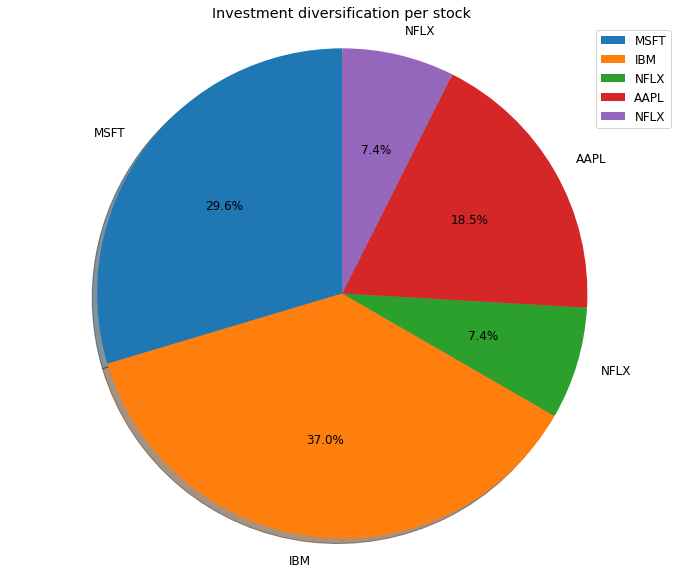

In [ ]:
#Pie chart for the stock investment distribution based on individual stocks 

import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = stock_portfolio_csv['Ticker']
sizes = stock_portfolio_csv['Investment']

fig1, ax1 = plt.subplots(figsize=(12, 10))

patches, texts, autotexts = ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Investment diversification per stock")
plt.legend(patches, labels, loc="best")

plt.show()

In [ ]:
#Predicting cluster for investor's portfolio stocks based on the clustering model 

pred_stock_portfolio_df= pd.DataFrame(columns=['Ticker','Predicted_cluster','Investment'])
pd

<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>

In [ ]:
pred_stock_portfolio_df.columns
# print("test")

Index(['Ticker', 'Predicted_cluster', 'Investment'], dtype='object')

In [ ]:
#Predicting cluster for investor's portfolio stocks based on the clustering model 

#pred_stock_portfolio_df = pd.DataFrame(columns=['Ticker','Predicted_cluster','Investment'])

#iterate over all the stock tickers and predict cluster 
for index, row  in stock_portfolio_csv.iterrows():
    # print(row['Ticker'])
    # print(xgbModel(row['Ticker']))
    #print(type(xgbModel))
    customer_stock_model,stock_modified = xgbModel(row['Ticker'])
    #print(customer_stock_model)
    #print(stock_modified)
    customer_stock_cluster_pred = k_mean_model.predict([customer_stock_model])[0]
  
    pred_stock_portfolio_df.loc[len(pred_stock_portfolio_df)] = [row['Ticker'],customer_stock_cluster_pred , row['Investment']]
    
print (pred_stock_portfolio_df)

  Ticker Predicted_cluster Investment
0   MSFT                 5       8000
1    IBM                 1      10000
2   NFLX                 4       2000
3   AAPL                 1       5000
4   NFLX                 4       2000


In [ ]:
#Grouping the investment per cluster ,as we want investor to balance the investment per cluster 

pred_stock_portfolio_grouped_df =pred_stock_portfolio_df.groupby('Predicted_cluster', as_index=False).agg({"Investment": "sum"})

pred_stock_portfolio_grouped_df

,Predicted_cluster,Investment
0,1,15000
1,4,4000
2,5,8000


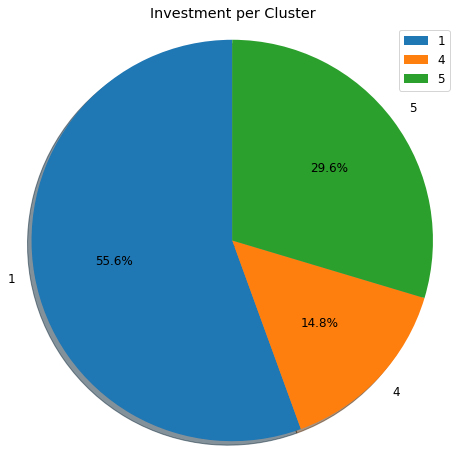

In [ ]:
# Pie chart, to show distribution of investment per cluster 
labels = pred_stock_portfolio_grouped_df['Predicted_cluster']
sizes = pred_stock_portfolio_grouped_df['Investment']


fig1, ax1 = plt.subplots(figsize=(8, 8))
patches, texts, autotexts = ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.legend(patches, labels, loc="best")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Investment per Cluster")

plt.show()

In [ ]:
#Taking Investors input regarding the new investment she/he wants to make 

stock_customer = input("Enter the stock ticker customer is interested in buying(we will use clustering) ?") or 'AAPL'
print(stock_customer)

Enter the stock ticker customer is interested in buying(we will use clustering) ?IBM
IBM


In [ ]:
customer_stock_model,stock_modified = xgbModel(stock_customer)
customer_stock_class_pred = knn.predict([customer_stock_model])

In [ ]:
print("Class Prediction for Investor's new Stock",customer_stock_class_pred)

Class Prediction for Investor's new Stock ['High']


In [ ]:
customer_stock_model,stock_modified = xgbModel(stock_customer)

#print(customer_stock_model.coef_)

customer_stock_class_pred = k_mean_model_1.predict([customer_stock_model])

In [ ]:
print("Cluster for Investor's new Stock:",stock_customer, " is :",customer_stock_class_pred[0])

Cluster for Investor's new Stock: IBM  is : 1


In [ ]:
pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 5.1 MB/s 


In [ ]:
import pickle

In [ ]:
filename = 'XGBoost.sav'

In [ ]:
pickle.dump(gbr,open(filename,'wb'))

NameError: ignored